In [1]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ### 
df0 = pd.read_csv("Ali_Baba_Stock_Data.csv")

# Display first few rows of the dataframe
### YOUR CODE HERE ### 
df0.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-19,90.673950,93.889999,99.699997,89.949997,92.699997,271879400
1,2014-09-22,86.810966,89.889999,92.949997,89.500000,92.699997,66657800
2,2014-09-23,84.184128,87.169998,90.480003,86.620003,88.940002,39009800
3,2014-09-24,87.467667,90.570000,90.570000,87.220001,88.470001,32088000
4,2014-09-25,85.874191,88.919998,91.500000,88.500000,91.089996,28598000


In [6]:
# Basic info about dataset
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2617 non-null   object 
 1   Adj Close  2617 non-null   float64
 2   Close      2617 non-null   float64
 3   High       2617 non-null   float64
 4   Low        2617 non-null   float64
 5   Open       2617 non-null   float64
 6   Volume     2617 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 143.2+ KB


In [7]:
# Summary statistics
df0.describe()

,Adj Close,Close,High,Low,Open,Volume
count,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2.617000e+03
mean,130.763001,135.153905,136.919684,133.360942,135.248746,1.899231e+07
std,56.741744,58.951556,59.579593,58.244218,59.037467,1.291504e+07
min,55.424198,57.389999,58.650002,57.200001,57.299999,3.775300e+06
25%,82.445793,84.849998,85.699997,84.000000,85.000000,1.186070e+07
50%,105.469185,108.989998,110.650002,107.260002,108.500000,1.600840e+07
75%,173.061798,179.199997,181.389999,177.000000,179.369995,2.172430e+07
max,306.276886,317.140015,319.320007,308.910004,313.500000,2.718794e+08


In [8]:
# Check for missing values
df0.isna().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [11]:
# Verificar si quedan valores nulos
print(df0.isnull().sum())

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [14]:
# Identifica filas duplicadas
df0.duplicated()	

0       False
1       False
2       False
3       False
4       False
        ...  
2612    False
2613    False
2614    False
2615    False
2616    False
Length: 2617, dtype: bool

In [17]:
print(df0['Date'].dtype)

object


In [19]:
df0['Date'] = pd.to_datetime(df0['Date'])
print(df0['Date'].dtype)

datetime64[ns]


In [20]:
df0 = df0.sort_values(by='Date')

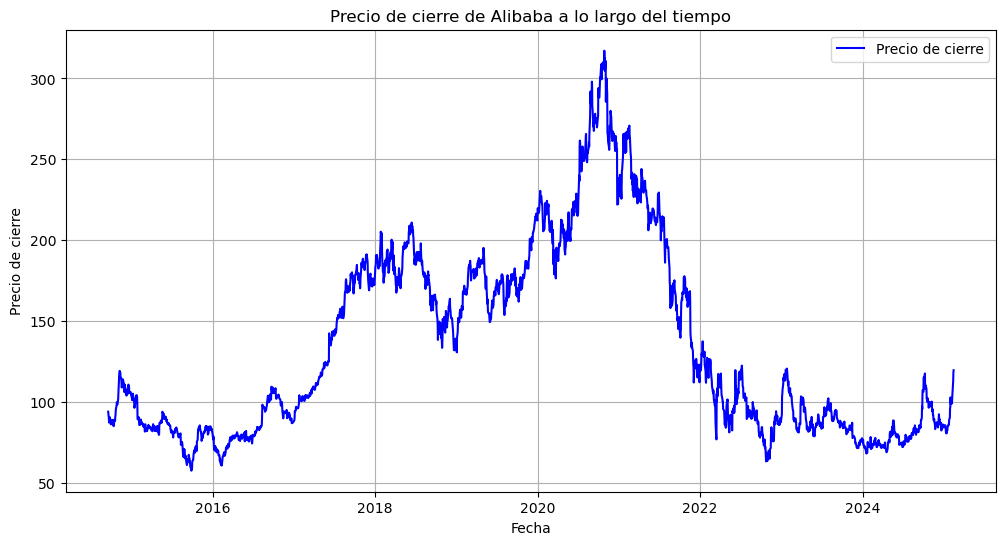

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df0['Date'], df0['Close'], label='Precio de cierre', color='blue')
plt.title('Precio de cierre de Alibaba a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.grid()
plt.show()

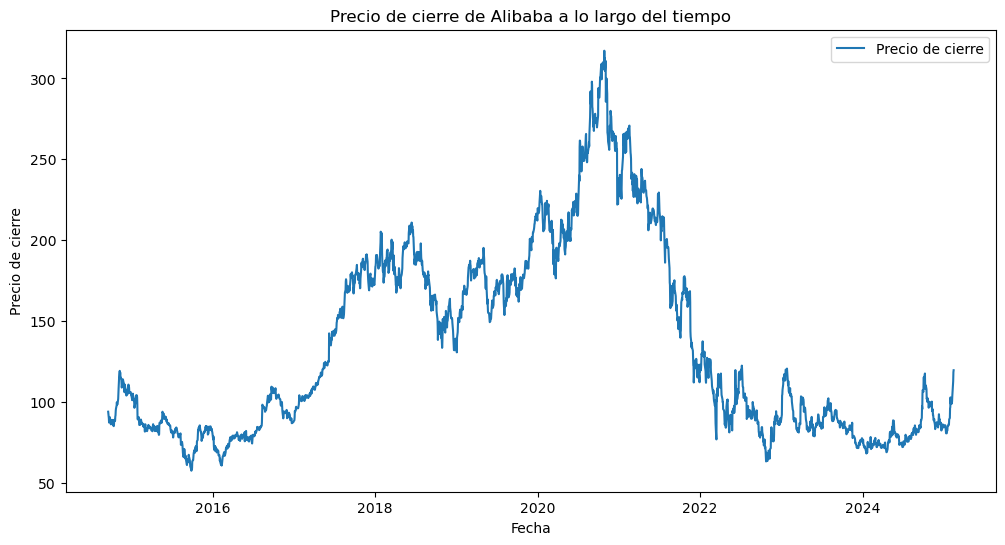

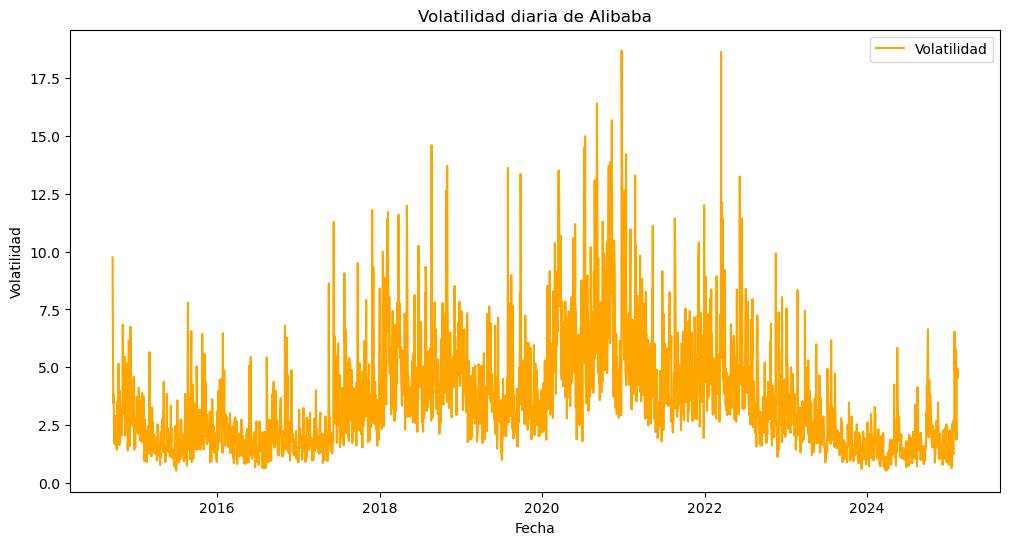

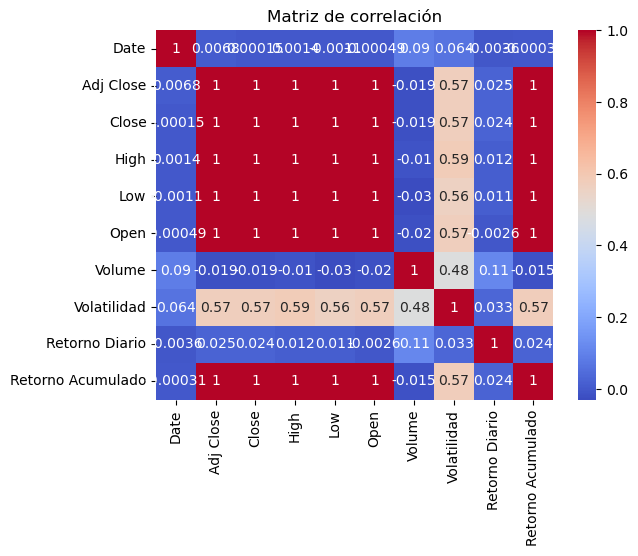

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tendencias temporales
plt.figure(figsize=(12, 6))
plt.plot(df0['Date'], df0['Close'], label='Precio de cierre')
plt.title('Precio de cierre de Alibaba a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.show()

# Volatilidad
df0['Volatilidad'] = df0['High'] - df0['Low']
plt.figure(figsize=(12, 6))
plt.plot(df0['Date'], df0['Volatilidad'], label='Volatilidad', color='orange')
plt.title('Volatilidad diaria de Alibaba')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.legend()
plt.show()

# Correlaciones
sns.heatmap(df0.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

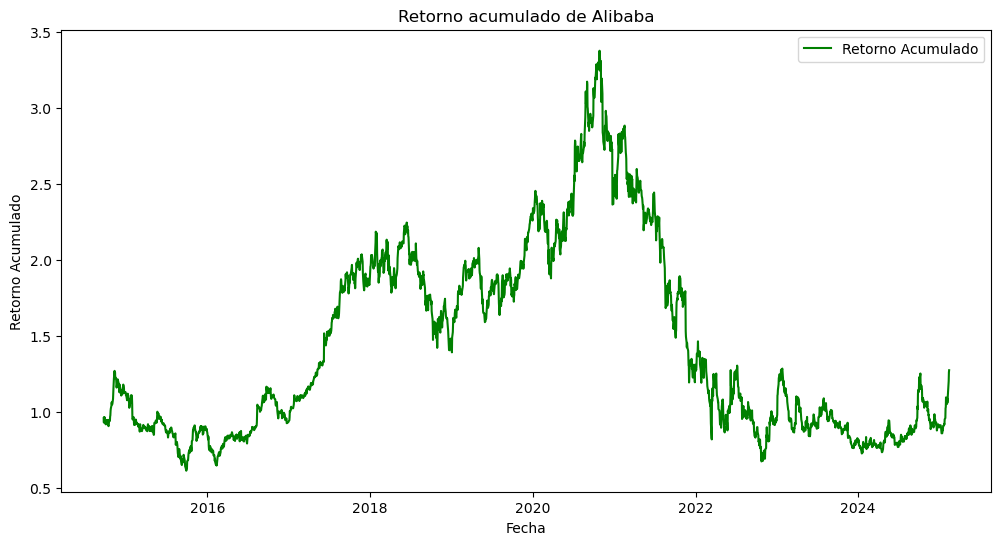

In [23]:
# Retornos diarios
df0['Retorno Diario'] = df0['Close'].pct_change()

# Retornos acumulados
df0['Retorno Acumulado'] = (1 + df0['Retorno Diario']).cumprod()

# Graficar retornos acumulados
plt.figure(figsize=(12, 6))
plt.plot(df0['Date'], df0['Retorno Acumulado'], label='Retorno Acumulado', color='green')
plt.title('Retorno acumulado de Alibaba')
plt.xlabel('Fecha')
plt.ylabel('Retorno Acumulado')
plt.legend()
plt.show()

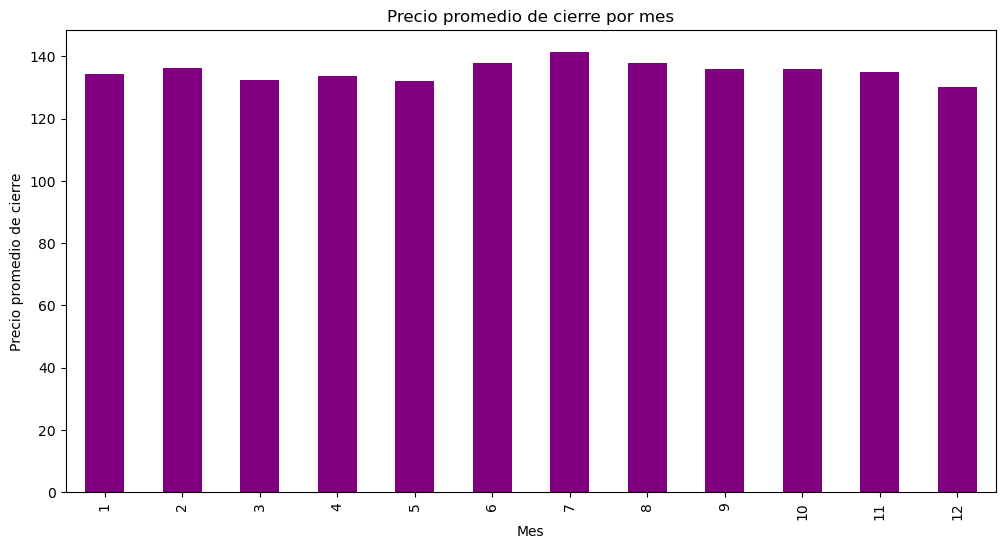

In [24]:
# Convertir la columna 'Date' a tipo datetime
df0['Date'] = pd.to_datetime(df0['Date'])

# Agrupar por mes y calcular el promedio de cierre
df0['Mes'] = df0['Date'].dt.month
df0_mensual = df0.groupby('Mes')['Close'].mean()

# Graficar patrones mensuales
plt.figure(figsize=(12, 6))
df0_mensual.plot(kind='bar', color='purple')
plt.title('Precio promedio de cierre por mes')
plt.xlabel('Mes')
plt.ylabel('Precio promedio de cierre')
plt.show()

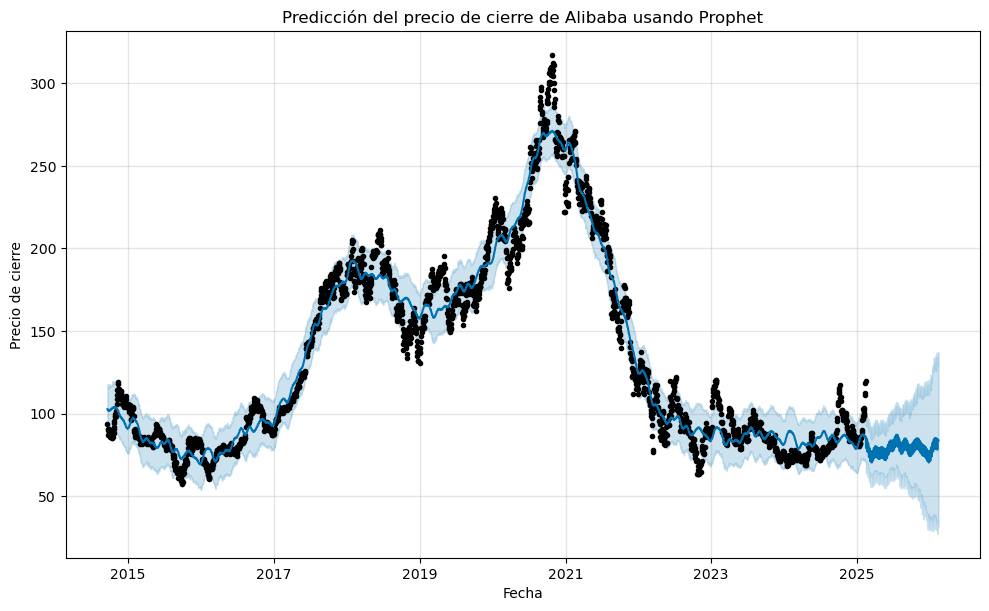

In [30]:
from prophet import Prophet
import matplotlib.pyplot as plt
import logging

# Desactivar mensajes de cmdstanpy
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

# Desactivar plotly y usar matplotlib
Prophet.plotting_backend = 'matplotlib'

# Preparar los datos para Prophet
df0_prophet = df0[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Crear y entrenar el modelo
model_prophet = Prophet()
model_prophet.fit(df0_prophet)

# Crear un DataFrame para predicciones futuras
future = model_prophet.make_future_dataframe(periods=365)  # Predicción para 1 año
forecast = model_prophet.predict(future)

# Graficar las predicciones
model_prophet.plot(forecast)
plt.title('Predicción del precio de cierre de Alibaba usando Prophet')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.show()

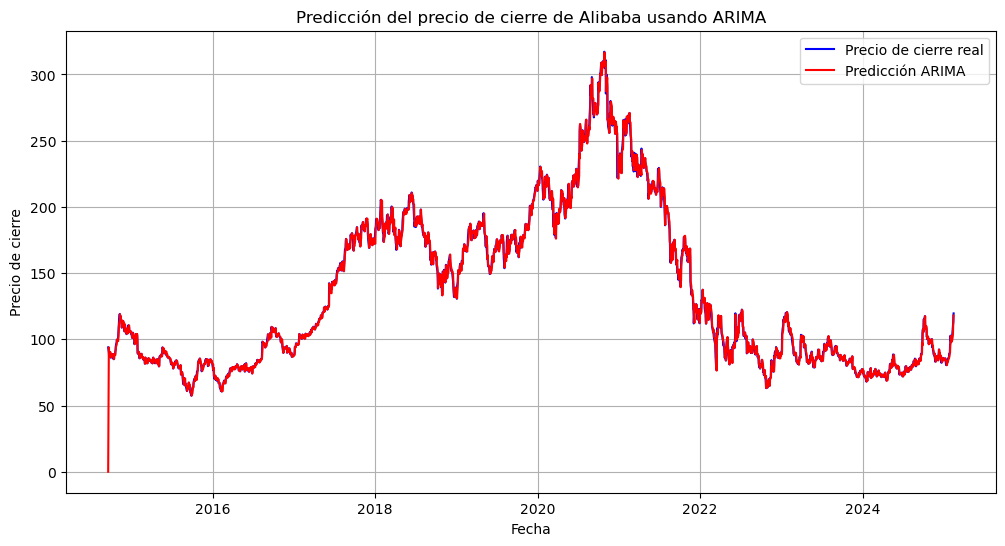

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Crear y entrenar el modelo ARIMA
model_arima = ARIMA(df0['Close'], order=(5, 1, 0))  # Parámetros (p, d, q)
results_arima = model_arima.fit()

# Hacer predicciones
df0['Prediccion_ARIMA'] = results_arima.predict(start=0, end=len(df0)-1)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df0['Date'], df0['Close'], label='Precio de cierre real', color='blue')
plt.plot(df0['Date'], df0['Prediccion_ARIMA'], label='Predicción ARIMA', color='red')
plt.title('Predicción del precio de cierre de Alibaba usando ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.grid()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82546D+00    |proj g|=  8.59255D-02


 This problem is unconstrained.



At iterate    5    f=  2.71113D+00    |proj g|=  4.50138D-02

At iterate   10    f=  2.69747D+00    |proj g|=  2.35012D-02

At iterate   15    f=  2.69285D+00    |proj g|=  2.14751D-03

At iterate   20    f=  2.69251D+00    |proj g|=  1.28569D-03

At iterate   25    f=  2.69247D+00    |proj g|=  9.95469D-04

At iterate   30    f=  2.69246D+00    |proj g|=  1.27635D-04

At iterate   35    f=  2.69246D+00    |proj g|=  2.39519D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     39     43      1     0     0   4.065D-05   2.692D+00
  F =   2.6924617800197455     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

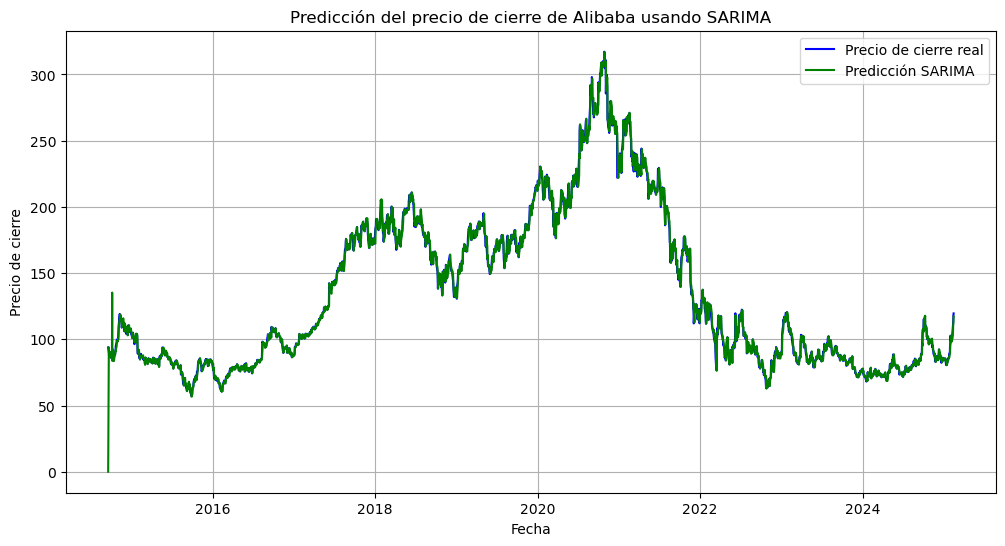

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Crear y entrenar el modelo SARIMA
model_sarima = SARIMAX(df0['Close'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))  # Parámetros (p, d, q) y (P, D, Q, S)
results_sarima = model_sarima.fit()

# Hacer predicciones
df0['Prediccion_SARIMA'] = results_sarima.predict(start=0, end=len(df0)-1)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df0['Date'], df0['Close'], label='Precio de cierre real', color='blue')
plt.plot(df0['Date'], df0['Prediccion_SARIMA'], label='Predicción SARIMA', color='green')
plt.title('Predicción del precio de cierre de Alibaba usando SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.grid()
plt.show()

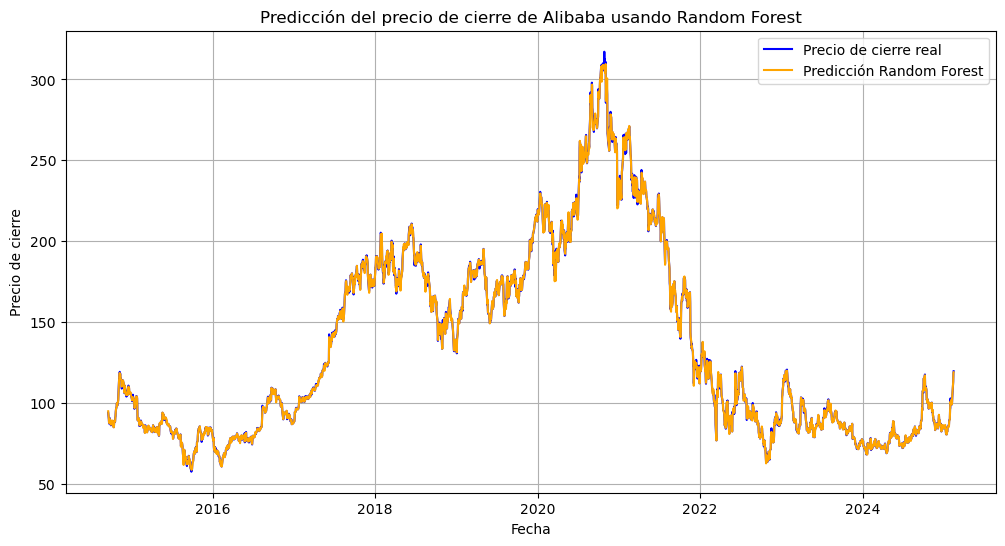

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Preparar los datos
df0['Date'] = pd.to_datetime(df0['Date'])
df0['Dia'] = df0['Date'].dt.day
df0['Mes'] = df0['Date'].dt.month
df0['Año'] = df0['Date'].dt.year

# Variables independientes (features)
X = df0[['Dia', 'Mes', 'Año', 'Open', 'High', 'Low', 'Volume']]
# Variable dependiente (target)
y = df0['Close']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Hacer predicciones
df0['Prediccion_RF'] = model_rf.predict(X)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df0['Date'], df0['Close'], label='Precio de cierre real', color='blue')
plt.plot(df0['Date'], df0['Prediccion_RF'], label='Predicción Random Forest', color='orange')
plt.title('Predicción del precio de cierre de Alibaba usando Random Forest')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.grid()
plt.show()

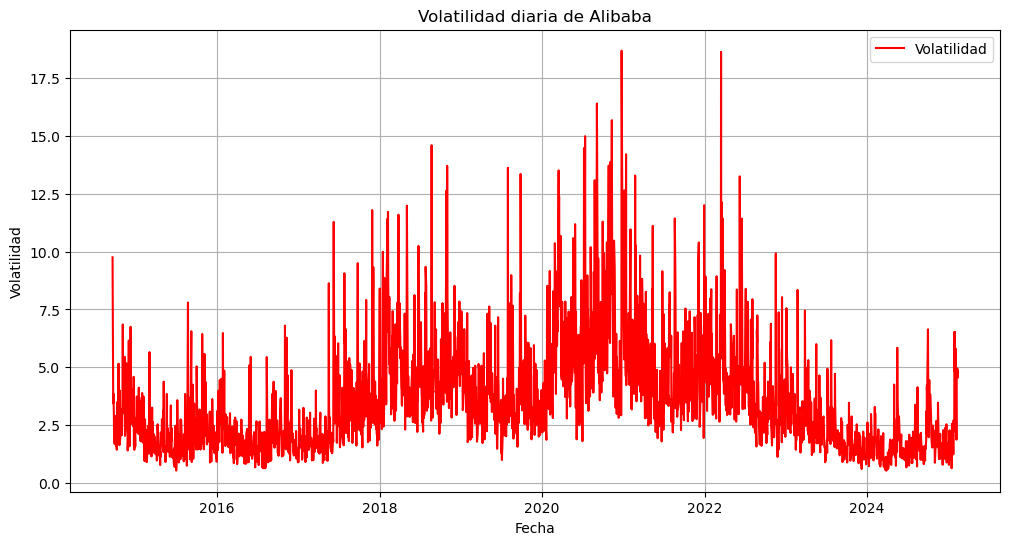

In [44]:
df0['Volatilidad'] = df0['High'] - df0['Low']

# Graficar la volatilidad
plt.figure(figsize=(12, 6))
plt.plot(df0['Date'], df0['Volatilidad'], label='Volatilidad', color='red')
plt.title('Volatilidad diaria de Alibaba')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.legend()
plt.grid()
plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar datos
df0 = pd.read_csv("Ali_Baba_Stock_Data.csv")

# Convertir 'Date' a datetime
df0['Date'] = pd.to_datetime(df0['Date'])

# Ordenar por fecha
df0 = df0.sort_values(by="Date")

# Escalar los datos de cierre
scaler = MinMaxScaler(feature_range=(0, 1))
df0['Close_Scaled'] = scaler.fit_transform(df0[['Close']])

# Dividir en train y test
train_size = int(len(df0) * 0.8)  # 80% entrenamiento, 20% prueba
train, test = df0[:train_size], df0[train_size:]


In [5]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Crear conjuntos de entrenamiento y prueba
time_step = 60
train_data = train[['Close_Scaled']].values
test_data = test[['Close_Scaled']].values

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reformatear para LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Crear modelo LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(25))
model_lstm.add(Dense(1))

# Compilar
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)


/Users/ghost/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0190 - val_loss: 3.6675e-04
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0011 - val_loss: 3.2147e-04
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 9.2538e-04 - val_loss: 3.5427e-04
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 8.4864e-04 - val_loss: 2.5939e-04
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 9.2286e-04 - val_loss: 3.6632e-04
Epoch 6/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 7.5942e-04 - val_loss: 2.1259e-04
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 6.3243e-04 - val_loss: 4.0706e-04
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 7.1658e-04 - val_loss: 1.8257e-04
Epoch 9/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 5.8779e-04 - val_loss: 2.0761e-04
Epoch 10/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 5.0905e-04 - val_loss: 1.3303e-04
Epoch 11/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - l

In [8]:
train_loss = model_lstm.evaluate(X_train, y_train)
test_loss = model_lstm.evaluate(X_test, y_test)

print(f'Pérdida en entrenamiento: {train_loss}')
print(f'Pérdida en prueba: {test_loss}')


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.4044e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.3149e-05
Pérdida en entrenamiento: 0.00026614853413775563
Pérdida en prueba: 6.798190588597208e-05


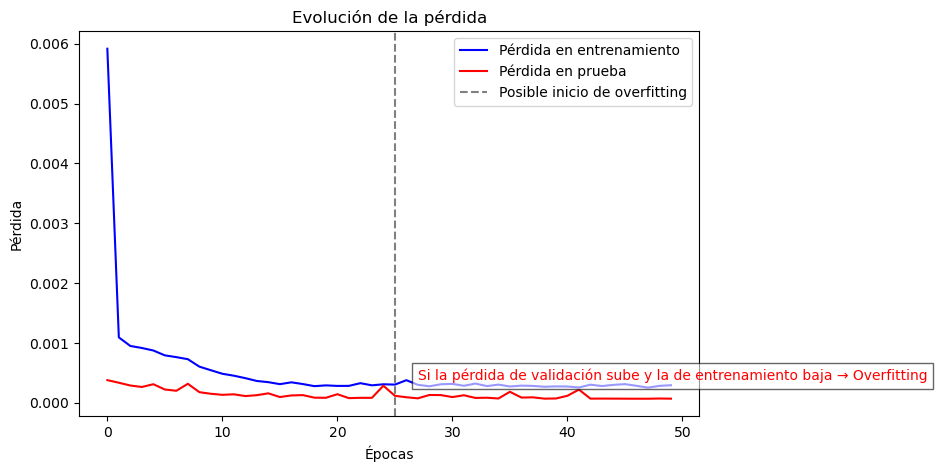

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Pérdida en entrenamiento', color='blue')
plt.plot(history.history['val_loss'], label='Pérdida en prueba', color='red')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida')

# Agregar anotaciones para detectar overfitting
plt.axvline(x=len(history.history['loss']) // 2, color='gray', linestyle='--', label='Posible inicio de overfitting')
plt.text(len(history.history['loss']) // 2 + 2, max(history.history['val_loss']), 
         'Si la pérdida de validación sube y la de entrenamiento baja → Overfitting', 
         fontsize=10, color='red', bbox=dict(facecolor='white', alpha=0.6))

plt.legend()
plt.show()

